### Голубинов Владислав Андреевич 18-АС (18-ИВТ-1)
5 Вариант, 1 Сеть

In [1]:
#!unzip -uq "/content/drive/My Drive/colab data/lab2cut/pet.zip" -d "/content/drive/My Drive/colab data/lab2cut/pet"

In [2]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import ImageFile
import tensorflow as tf
from keras.layers import *
from keras.optimizers import *
from keras.applications import *
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import backend as k

In [3]:
ImageFile.LOAD_TRUNCATED_IMAGES = True
nb_classes = 2  # number of classes
img_width, img_height = 299, 299  # change based on the shape/structure of your images
batch_size = 256 # 4, 8, 16, 32, 64, 128, 256 dependent on CPU/GPU memory capacity (powers of 2 values).
transformation_ratio = .05  # how aggressive will be the data augmentation/transformation

train_data_dir = "/content/drive/My Drive/colab data/lab2cut/pet/pet/train"
validation_data_dir = "/content/drive/My Drive/colab data/lab2cut/pet/pet/test"

In [4]:
base_model = Xception(input_shape=(img_width, img_height, 3), weights='imagenet', include_top=False)

83689472/83683744 [==============================] - 0s 0us/step


In [5]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(nb_classes, activation='softmax')(x)

In [6]:
model = Model(base_model.input, predictions)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

In [7]:
for layer in base_model.layers:
    layer.trainable = False

In [8]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=transformation_ratio,
                                   shear_range=transformation_ratio,
                                   zoom_range=transformation_ratio,
                                   cval=transformation_ratio,
                                   horizontal_flip=True,
                                   vertical_flip=True)

validation_datagen = ImageDataGenerator(rescale=1. / 255)

In [9]:
os.makedirs(os.path.join(os.path.abspath(train_data_dir), '../preview'), exist_ok=True)
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

Found 2598 images belonging to 2 classes.


In [10]:
validation_generator = validation_datagen.flow_from_directory(validation_data_dir,
                                                              target_size=(img_width, img_height),
                                                              batch_size=batch_size,
                                                              class_mode='categorical')

Found 402 images belonging to 2 classes.


In [11]:
model.compile(optimizer='nadam',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [12]:
callbacks_list = [
    EarlyStopping(monitor='accuracy', 
                  patience=5,  # Number of epochs with no improvement after which training will be stopped.
                  verbose=0)
]

In [13]:
ImageFile.LOAD_TRUNCATED_IMAGES = True
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.n // batch_size,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.n // batch_size,
                    verbose=1,
                    callbacks=callbacks_list)

Epoch 1/30
10/10 [==============================] - 1124s 112s/step - loss: 0.5613 - accuracy: 0.7626 - val_loss: 0.3477 - val_accuracy: 0.9688
Epoch 2/30
10/10 [==============================] - 50s 5s/step - loss: 0.3304 - accuracy: 0.9342 - val_loss: 0.1947 - val_accuracy: 0.9961
Epoch 3/30
10/10 [==============================] - 53s 5s/step - loss: 0.2274 - accuracy: 0.9488 - val_loss: 0.1219 - val_accuracy: 0.9961
Epoch 4/30
10/10 [==============================] - 49s 5s/step - loss: 0.1763 - accuracy: 0.9547 - val_loss: 0.0849 - val_accuracy: 1.0000
Epoch 5/30
10/10 [==============================] - 49s 5s/step - loss: 0.1552 - accuracy: 0.9547 - val_loss: 0.0685 - val_accuracy: 0.9922
Epoch 6/30
10/10 [==============================] - 54s 5s/step - loss: 0.1285 - accuracy: 0.9616 - val_loss: 0.0652 - val_accuracy: 0.9922
Epoch 7/30
10/10 [==============================] - 50s 5s/step - loss: 0.1334 - accuracy: 0.9539 - val_loss: 0.0505 - val_accuracy: 0.9922
Epoch 8/30
10/10

In [14]:
model.save_weights("/content/drive/My Drive/Colab models/lab2/model_wieghts-10.h5")

In [15]:
model.save("/content/drive/My Drive/Colab models/lab2/model_keras-10.h5")

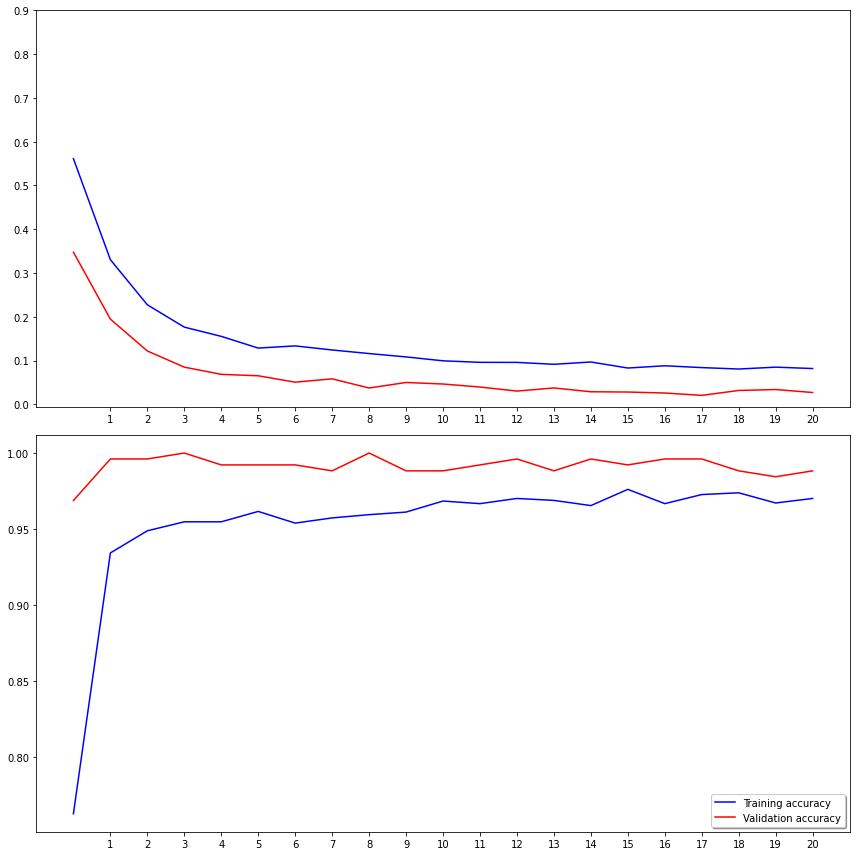

In [19]:
epochs = 21
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()